In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from scipy.stats import linregress

In [3]:
floods_df= pd.read_csv('floods1900-2020.csv')
floods_df

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,EVENT START DATE,COMMENTS,FATALITIES,INJURED / INFECTED,EVACUATED,...,EVENT END DATE,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
0,Disaster,Natural,Meteorological - Hydrological,Flood,Regional Municipality of Wood Buffalo,4/26/2020 12:00:00 AM,"On April 26th, the Regional Municipality of Wo...",1.0,1.0,13000.0,...,5/3/2020 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,549213000.0,NaN,NaN,NaN
1,Disaster,Natural,Meteorological - Hydrological,Flood,"Fort Vermilion, Alberta",4/23/2020 12:00:00 AM,"On April 23rd, Mackenzie County, AB, issued an...",0.0,0.0,450.0,...,5/3/2020 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Disaster,Natural,Meteorological - Hydrological,Flood,Eastern Canada,4/18/2019 12:00:00 AM,Extensive flooding in April and May was experi...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The most severe flooding took place in Quebec ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,States of emergency extended across the 3 prov...,1,NaN,10000,0,NaN,4/18/2019 12:00:00 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,Disaster,Natural,Meteorological - Hydrological,Flood,"Old Man River, Alberta",6/6/1908 12:00:00 AM,"In June of 1908, Old Man River in Alberta expe...",NaN,NaN,NaN,...,6/6/1908 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
354,Disaster,Natural,Meteorological - Hydrological,Flood,"Port Arthur, Ontario",5/28/1908 12:00:00 AM,"On May 28th, heavy rains caused the Paquette e...",5.0,NaN,NaN,...,5/28/1908 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
355,Disaster,Natural,Meteorological - Hydrological,Flood,Red River MB,4/24/1904 12:00:00 AM,"Red River MB, April 24, 1904. Severe flooding ...",0.0,0.0,0.0,...,4/24/1904 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
356,Disaster,Natural,Meteorological - Hydrological,Flood,"Lumsden, Saskatchewan",4/1/1904 12:00:00 AM,"In the spring of 1904, Lumsden, SK, had ""the y...",NaN,NaN,NaN,...,6/1/1904 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [3]:
floods_df.columns

Index(['EVENT CATEGORY', 'EVENT GROUP', 'EVENT SUBGROUP', 'EVENT TYPE',
       'PLACE', 'EVENT START DATE', 'COMMENTS', 'FATALITIES',
       'INJURED / INFECTED', 'EVACUATED', 'ESTIMATED TOTAL COST',
       'NORMALIZED TOTAL COST', 'EVENT END DATE', 'FEDERAL DFAA PAYMENTS',
       'PROVINCIAL DFAA PAYMENTS', 'PROVINCIAL DEPARTMENT PAYMENTS',
       'MUNICIPAL COSTS', 'OGD COSTS', 'INSURANCE PAYMENTS', 'NGO PAYMENTS',
       'UTILITY - PEOPLE AFFECTED', 'MAGNITUDE'],
      dtype='object')

In [4]:
floods_new_df = floods_df[['EVENT TYPE', 'PLACE', 'EVENT START DATE']]
floods_new_df

,EVENT TYPE,PLACE,EVENT START DATE
0,Flood,Regional Municipality of Wood Buffalo,4/26/2020 12:00:00 AM
1,Flood,"Fort Vermilion, Alberta",4/23/2020 12:00:00 AM
2,Flood,Eastern Canada,4/18/2019 12:00:00 AM
3,NaN,NaN,NaN
4,10000,0,NaN
...,...,...,...
353,Flood,"Old Man River, Alberta",6/6/1908 12:00:00 AM
354,Flood,"Port Arthur, Ontario",5/28/1908 12:00:00 AM
355,Flood,Red River MB,4/24/1904 12:00:00 AM
356,Flood,"Lumsden, Saskatchewan",4/1/1904 12:00:00 AM


In [5]:
floods_new_df['EVENT TYPE'].unique()

array(['Flood', nan, '10000', '1400', '4900', '560', '500', '3000',
       '1000', '40', '0', '1600'], dtype=object)

In [6]:
print(floods_new_df.isnull().sum())


EVENT TYPE          12
PLACE               12
EVENT START DATE    19
dtype: int64


In [8]:
# Replace numeric values with "Flood"
floods_new_df['EVENT TYPE'] = floods_new_df['EVENT TYPE'].apply(lambda x: 'Flood' if pd.to_numeric(x, errors='coerce') is not None else x)
floods_new_df


/var/folders/wz/kwn_hsrs7cx5m5c64kzwf_lm0000gn/T/ipykernel_49847/1663150266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floods_new_df['EVENT TYPE'] = floods_new_df['EVENT TYPE'].apply(lambda x: 'Flood' if pd.to_numeric(x, errors='coerce') is not None else x)


,EVENT TYPE,PLACE,EVENT START DATE
0,Flood,Regional Municipality of Wood Buffalo,4/26/2020 12:00:00 AM
1,Flood,"Fort Vermilion, Alberta",4/23/2020 12:00:00 AM
2,Flood,Eastern Canada,4/18/2019 12:00:00 AM
3,Flood,NaN,NaN
4,Flood,0,NaN
...,...,...,...
353,Flood,"Old Man River, Alberta",6/6/1908 12:00:00 AM
354,Flood,"Port Arthur, Ontario",5/28/1908 12:00:00 AM
355,Flood,Red River MB,4/24/1904 12:00:00 AM
356,Flood,"Lumsden, Saskatchewan",4/1/1904 12:00:00 AM


In [9]:
print(floods_new_df.isnull().sum())

EVENT TYPE           0
PLACE               12
EVENT START DATE    19
dtype: int64


In [10]:
floods_new_df = floods_new_df.dropna()

In [13]:
floods_new_df['EVENT START DATE'] = pd.to_datetime(floods_new_df['EVENT START DATE'], errors='coerce')

/var/folders/wz/kwn_hsrs7cx5m5c64kzwf_lm0000gn/T/ipykernel_49847/625738399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floods_new_df['EVENT START DATE'] = pd.to_datetime(floods_new_df['EVENT START DATE'], errors='coerce')


In [14]:
floods_new_df.dtypes

EVENT TYPE                  object
PLACE                       object
EVENT START DATE    datetime64[ns]
dtype: object

In [15]:
floods_new_df

,EVENT TYPE,PLACE,EVENT START DATE
0,Flood,Regional Municipality of Wood Buffalo,2020-04-26
1,Flood,"Fort Vermilion, Alberta",2020-04-23
2,Flood,Eastern Canada,2019-04-18
5,Flood,"Kashechewan, Ontario",2019-04-15
6,Flood,Toronto,2018-08-07
...,...,...,...
353,Flood,"Old Man River, Alberta",1908-06-06
354,Flood,"Port Arthur, Ontario",1908-05-28
355,Flood,Red River MB,1904-04-24
356,Flood,"Lumsden, Saskatchewan",1904-04-01


In [16]:
print(floods_new_df.isnull().sum())

EVENT TYPE          0
PLACE               0
EVENT START DATE    7
dtype: int64


In [17]:
# Extract Year and Month into new columns
floods_new_df['Year'] = floods_new_df['EVENT START DATE'].dt.year
floods_new_df['Month'] = floods_new_df['EVENT START DATE'].dt.month

floods_new_df

/var/folders/wz/kwn_hsrs7cx5m5c64kzwf_lm0000gn/T/ipykernel_49847/505665371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floods_new_df['Year'] = floods_new_df['EVENT START DATE'].dt.year
/var/folders/wz/kwn_hsrs7cx5m5c64kzwf_lm0000gn/T/ipykernel_49847/505665371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floods_new_df['Month'] = floods_new_df['EVENT START DATE'].dt.month


,EVENT TYPE,PLACE,EVENT START DATE,Year,Month
0,Flood,Regional Municipality of Wood Buffalo,2020-04-26,2020.0,4.0
1,Flood,"Fort Vermilion, Alberta",2020-04-23,2020.0,4.0
2,Flood,Eastern Canada,2019-04-18,2019.0,4.0
5,Flood,"Kashechewan, Ontario",2019-04-15,2019.0,4.0
6,Flood,Toronto,2018-08-07,2018.0,8.0
...,...,...,...,...,...
353,Flood,"Old Man River, Alberta",1908-06-06,1908.0,6.0
354,Flood,"Port Arthur, Ontario",1908-05-28,1908.0,5.0
355,Flood,Red River MB,1904-04-24,1904.0,4.0
356,Flood,"Lumsden, Saskatchewan",1904-04-01,1904.0,4.0


In [18]:
# Count flood occurrences per year and area
flood_counts = floods_new_df.groupby(['Year']).size().reset_index(name='Count')
flood_counts

,Year,Count
0,1902.0,1
1,1904.0,2
2,1908.0,2
3,1909.0,1
4,1915.0,2
...,...,...
85,2016.0,7
86,2017.0,5
87,2018.0,5
88,2019.0,2


/var/folders/wz/kwn_hsrs7cx5m5c64kzwf_lm0000gn/T/ipykernel_49847/113153780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=flood_counts, x='Year', y='Count', palette='viridis')
/var/folders/wz/kwn_hsrs7cx5m5c64kzwf_lm0000gn/T/ipykernel_49847/113153780.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Affected Area', bbox_to_anchor=(1.05, 1), loc='upper left')


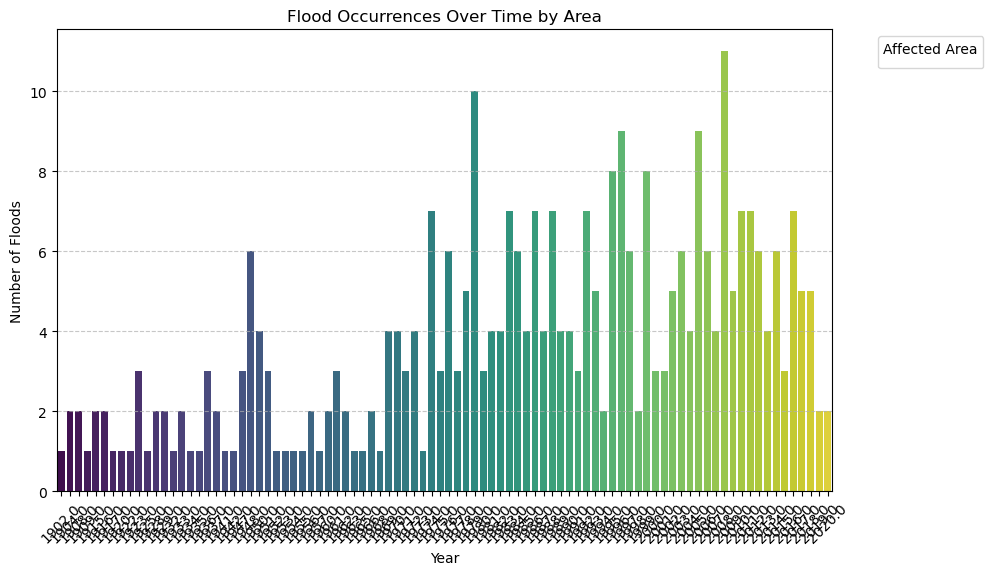

In [19]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=flood_counts, x='Year', y='Count', palette='viridis')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of Floods')
plt.title('Flood Occurrences Over Time by Area')
plt.legend(title='Affected Area', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

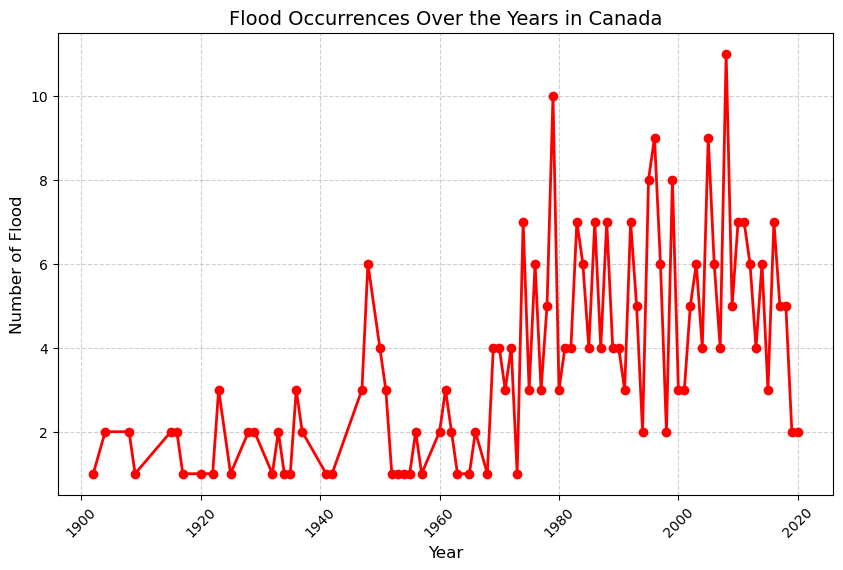

In [21]:
import numpy as np

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the line graph
plt.plot(flood_counts['Year'], flood_counts['Count'], marker='o', linestyle='-', color='red', linewidth=2)

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Flood', fontsize=12)
plt.title('Flood Occurrences Over the Years in Canada', fontsize=14)

# Set x-axis ticks at 20-year intervals
x_ticks = np.arange(1900, flood_counts['Year'].max() + 1, 20)  # Adjust the range as needed
plt.xticks(x_ticks, rotation=45)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

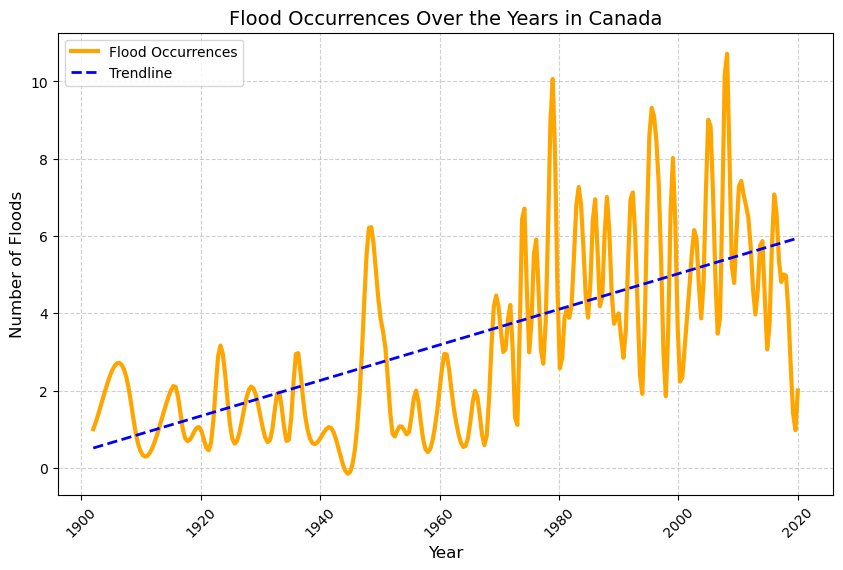

In [23]:
# Sort data by Year (if not already sorted)
flood_counts = flood_counts.sort_values(by='Year')

# Extract X (Years) and Y (Flood Counts)
X = flood_counts['Year']
Y = flood_counts['Count']

# Generate smooth X values for interpolation
X_smooth = np.linspace(X.min(), X.max(), 300)

# Create a cubic spline interpolation for a smooth flood occurrences line
spline = make_interp_spline(X, Y, k=3)
Y_smooth = spline(X_smooth)

# Compute the linear trendline
slope, intercept, _, _, _ = linregress(X, Y)
trendline_Y = slope * X + intercept  # Y-values for the trendline

# Plot
plt.figure(figsize=(10, 6))

# Smooth flood occurrences line
plt.plot(X_smooth, Y_smooth, color='orange', linewidth=3, label='Flood Occurrences')

# Linear trendline
plt.plot(X, trendline_Y, color='blue', linestyle='dashed', linewidth=2, label='Trendline')

# Labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Floods', fontsize=12)
plt.title('Flood Occurrences Over the Years in Canada', fontsize=14)

# Set x-axis ticks at 20-year intervals
plt.xticks(np.arange(1900, X.max() + 1, 20), rotation=45)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend()

# Show the plot
plt.show()


In [27]:
# Count flood occurrences per year and place
flood_counts2 = floods_new_df.groupby(['Year', 'PLACE']).size().reset_index(name='Count')
flood_counts2

,Year,PLACE,Count
0,1902.0,Saint John River Basin NB,1
1,1904.0,"Lumsden, Saskatchewan",1
2,1904.0,Red River MB,1
3,1908.0,"Old Man River, Alberta",1
4,1908.0,"Port Arthur, Ontario",1
...,...,...,...
322,2018.0,Toronto,1
323,2019.0,Eastern Canada,1
324,2019.0,"Kashechewan, Ontario",1
325,2020.0,"Fort Vermilion, Alberta",1


In [28]:
flood_counts2.to_csv("floods_cleaned.csv", index=False)